In [1]:
import numpy as np
import pandas as pd,os
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import scikit_posthocs as sp

## Notes
+ NB tops ranking with both metrics for Noisy data
+ RF & LR (both simple & balanced) tops for Clean datasets. Interestingly, simple methods without imbalanced technique (RF & LR) performs better than rest.

In [81]:
noise = pd.read_csv("Imb X Clf-Noisy.csv",header=[0,1,2],index_col=0)
clean = pd.read_csv("Imb X Clf-Clean.csv",header=[0,1,2],index_col=0)
df = clean
boo = "Clean"

In [82]:
tmp = df.drop(columns=['pr_rec_score'],axis=1,level=2)
tmp

imb                                            smote                    \
clf                                               dt                lr   
metric                             matthews_corrcoef matthews_corrcoef   
activemq-5.8.0.csv                          0.196913          0.296168   
groovy-1_6_BETA_1.csv                       0.367899          0.473138   
activemq-5.3.0.csv                          0.285500          0.381879   
wicket-1.3.0-incubating-beta-1.csv          0.263193          0.413689   
jruby-1.1.csv                               0.373812          0.411260   
jruby-1.4.0.csv                             0.393588          0.405461   
lucene-2.3.0.csv                            0.622233          0.707508   
hbase-0.95.2.csv                            0.272074          0.385804   
lucene-3.0.0.csv                            0.325294          0.391407   
camel-2.9.0.csv                             0.197059          0.228561   
wicket-1.5.3.csv                            0.161411          0.223621   
lucene-3.1.csv                              0.130991          0.149755   
groovy-1_6_BETA_2.csv                       0.373770          0.398580   
activemq-5.2.0.csv                          0.393267          0.460558   
groovy-1_5_7.csv                            0.270940          0.283714   
hbase-0.95.0.csv                            0.357146          0.362300   
camel-2.11.0.csv                            0.205714          0.229100   
jruby-1.7.0.preview1.csv                    0.208055          0.322057   
hive-0.10.0.csv                             0.388945          0.446857   
camel-2.10.0.csv                            0.215427          0.245445   
derby-10.2.1.6.csv                          0.459550          0.582622   
jruby-1.5.0.csv                             0.276366          0.409556   
derby-10.3.1.4.csv                          0.400133          0.508666   
lucene-2.9.0.csv                            0.343357          0.368676   
hbase-0.94.0.csv                            0.414466          0.471917   
camel-1.4.0.csv                             0.300905          0.400229   
activemq-5.1.0.csv                          0.210970          0.288985   
activemq-5.0.0.csv                          0.480874          0.559434   
derby-10.5.1.1.csv                          0.282453          0.370996   
wicket-1.3.0-beta2.csv                      0.190883          0.304223   
hive-0.12.0.csv                             0.345562          0.334959   
hive-0.9.0.csv                              0.508054          0.504747   

imb                                                                     \
clf                                               nb               knn   
metric                             matthews_corrcoef matthews_corrcoef   
activemq-5.8.0.csv                          0.292682          0.257560   
groovy-1_6_BETA_1.csv                       0.296647          0.397170   
activemq-5.3.0.csv                          0.332634          0.281184   
wicket-1.3.0-incubating-beta-1.csv          0.336667          0.343004   
jruby-1.1.csv                               0.457234          0.388813   
jruby-1.4.0.csv                             0.440695          0.407964   
lucene-2.3.0.csv                            0.600542          0.633333   
hbase-0.95.2.csv                            0.324707          0.290487   
lucene-3.0.0.csv                            0.306350          0.326408   
camel-2.9.0.csv                             0.218451          0.213334   
wicket-1.5.3.csv                            0.241806          0.183290   
lucene-3.1.csv                              0.169385          0.160663   
groovy-1_6_BETA_2.csv                       0.269920          0.390803   
activemq-5.2.0.csv                          0.421221          0.368113   
groovy-1_5_7.csv                            0.298141          0.274786   
hbase-0.95.0.csv                            0.302982          0.370122   
cam

In [83]:
mat = tmp.droplevel(2,axis=1)
print(mat.shape)

(32, 26)


In [84]:
rank = mat.copy()
for d in mat.index:
    rank.loc[d] = rankdata(mat.loc[d])

In [85]:
rank.mean().sort_values().to_csv(f"figures/{boo} Comb Rank.csv")
rank.mean().sort_values()

/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


imb     clf      
rus     dt            2.59375
smote   dt            6.21875
tomek   dt            6.90625
rus     knn           7.81250
smote   knn           8.56250
ens     rboost_NB     8.90625
wilson  nb            9.68750
rus     nb           10.34375
ens     bbag_NB      10.56250
smote   nb           10.65625
wilson  dt           10.93750
ens     rboost_DT    12.18750
tomek   nb           12.53125
rus     lr           12.65625
tomek   knn          12.93750
rus     rf           15.50000
smote   lr           16.15625
wilson  knn          16.28125
sim     LR           16.59375
tomek   lr           18.28125
sim     RF           18.87500
ens     bbag_DT      18.93750
wilson  lr           20.40625
tomek   rf           20.96875
wilson  rf           22.75000
smote   rf           22.75000
dtype: float64

In [86]:
rank.mean(level=0,axis=1).mean()

imb
smote     12.868750
rus        9.781250
wilson    16.012500
tomek     14.325000
ens       12.648438
sim       17.734375
dtype: float64

In [87]:
rank.mean(level=1,axis=1).mean()

clf
dt            6.664062
lr           16.875000
nb           10.804688
knn          11.398438
rf           20.492188
rboost_DT    12.187500
rboost_NB     8.906250
bbag_DT      18.937500
bbag_NB      10.562500
LR           16.593750
RF           18.875000
dtype: float64

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

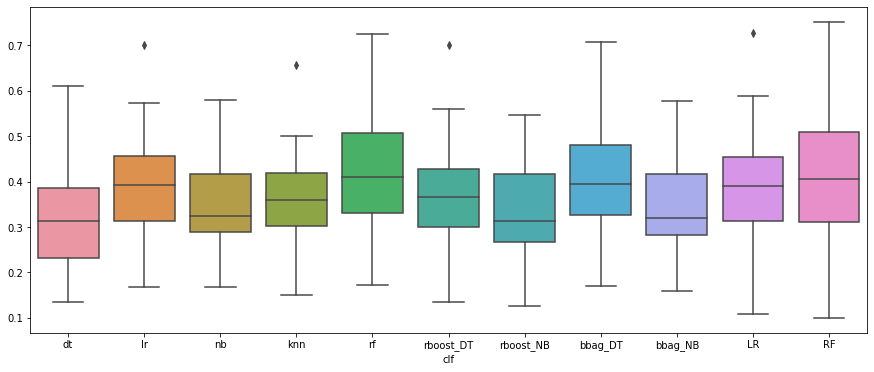

In [89]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(data=mat.mean(level=1,axis=1));
fig.get_figure().savefig(f"figures/{boo}_clf_rank.svg",format='svg');

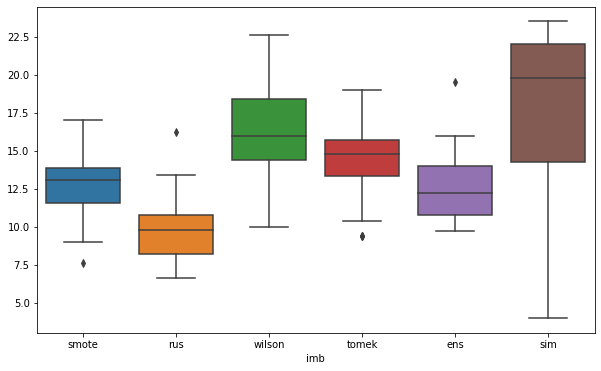

In [90]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(data=rank.mean(level=0,axis=1));
fig.get_figure().savefig(f"figures/{boo}_imb_rank.svg",format='svg');